# Klasifikasi Penyakit Lung Cancer

# Business Understanding

Kanker paru - paru merupakan salah satu penyakit yang paling banyak terjadi. Salah satu yang menjadi pemicu penyakit kanker paru - paru adalah kebiasaan merokok. Namun ada juga yang yang terkena penyakit kanker paru - paru karena gaya hidup sehari - hari yang tidak teratur dan tidak sehat. Pengidap penyakit kanker paru - paru biasanya memiliki beberapa gejala seperti batuk, susah napas, dan lainnya. Hal itulah yang menjadi tujuan disini, yaitu agar mengetahui apakah kita mengidap kanker paru - paru atau tidak melalui gejala - gejala tertentu.

# Data Understanding

Dari file survey lung cancer.csv terdapat 16 kolom yang yang tipe datanya integer dan object

Gender: M(male), F(female)

Age: Age of the patient

Smoking: YES=2 , NO=1.

Yellow fingers: YES=2 , NO=1.

Anxiety: YES=2 , NO=1.

Peer_pressure: YES=2 , NO=1.

Chronic Disease: YES=2 , NO=1.

Fatigue: YES=2 , NO=1.

Allergy: YES=2 , NO=1.

Wheezing: YES=2 , NO=1.

Alcohol: YES=2 , NO=1.

Coughing: YES=2 , NO=1.

Shortness of Breath: YES=2 , NO=1.

Swallowing Difficulty: YES=2 , NO=1.

Chest pain: YES=2 , NO=1.

Lung Cancer: YES , NO.

# Data Preparation

- Deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pickle

- Memanggil dataset

In [2]:
df = pd.read_csv('survey lung cancer.csv')

- Deskripsi dataset

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Cek data shape

df.shape

(309, 16)

In [5]:
# Cek data missing

df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
# Menghapus kolom AGE 

df.drop(columns=['AGE'],inplace=True)

In [7]:
# Mengganti Nama Tabel

df.rename(columns = {'CHRONIC DISEASE':'CHRONIC_DISEASE'}, inplace = True)
df.rename(columns = {'ALCOHOL CONSUMING':'ALCOHOL_CONSUMING'}, inplace = True)
df.rename(columns = {'SHORTNESS OF BREATH':'SHORTNESS_OF_BREATH'}, inplace = True)
df.rename(columns = {'SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY'}, inplace = True)
df.rename(columns = {'CHEST PAIN':'CHEST_PAIN'}, inplace = True)

df.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
# Info mengenai tipe data yang ada di tabel

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC_DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL_CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS_OF_BREATH    309 non-null    int64 
 12  SWALLOWING_DIFFICULTY  309 non-null    int64 
 13  CHEST_PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
dtypes: int64(13), object(2)

# Data Preprocessing

In [9]:
# Mengubah data dari (1,2) ke (0,1)

# Gender -> 1 = Male; 0 = Female

# 1= Yes; 0 = No

le = LabelEncoder()

df['GENDER']=le.fit_transform(df['GENDER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC_DISEASE']=le.fit_transform(df['CHRONIC_DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL_CONSUMING']=le.fit_transform(df['ALCOHOL_CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS_OF_BREATH']=le.fit_transform(df['SHORTNESS_OF_BREATH'])
df['SWALLOWING_DIFFICULTY']=le.fit_transform(df['SWALLOWING_DIFFICULTY'])
df['CHEST_PAIN']=le.fit_transform(df['CHEST_PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

df.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [10]:
# Info mengenai tipe data yang ada di tabel

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC_DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL_CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS_OF_BREATH    309 non-null    int64
 12  SWALLOWING_DIFFICULTY  309 non-null    int64
 13  CHEST_PAIN             309 non-null    int64
 14  LUNG_CANCER            309 non-null    int32
dtypes: int32(2), int64(13)
memory usage: 33.

In [11]:
# Mengubah data yang clean ke csv

df.to_csv('lung_cancer.csv')

# Modelling

In [12]:
ind_col = [col for col in df.columns if col != 'LUNG_CANCER']
dep_col = 'LUNG_CANCER'

In [13]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [15]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi data training : {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi data testing : {dtc_acc} \n")

print(f"Confussion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Classification Report : \n{classification_report(y_test, dtc.predict(x_test))}") 

Akurasi data training : 0.9230769230769231
Akurasi data testing : 0.8387096774193549 

Confussion matrix : 
[[ 4  6]
 [ 4 48]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.89      0.92      0.91        52

    accuracy                           0.84        62
   macro avg       0.69      0.66      0.68        62
weighted avg       0.83      0.84      0.83        62



In [16]:
input_data = (1,0,1,1,0,0,1,0,1,1,1,1,1,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Pasien tidak terkena penyakit kanker')
else :
    print ('Pasien terkena penyakit kanker')

[1]
Pasien terkena penyakit kanker


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


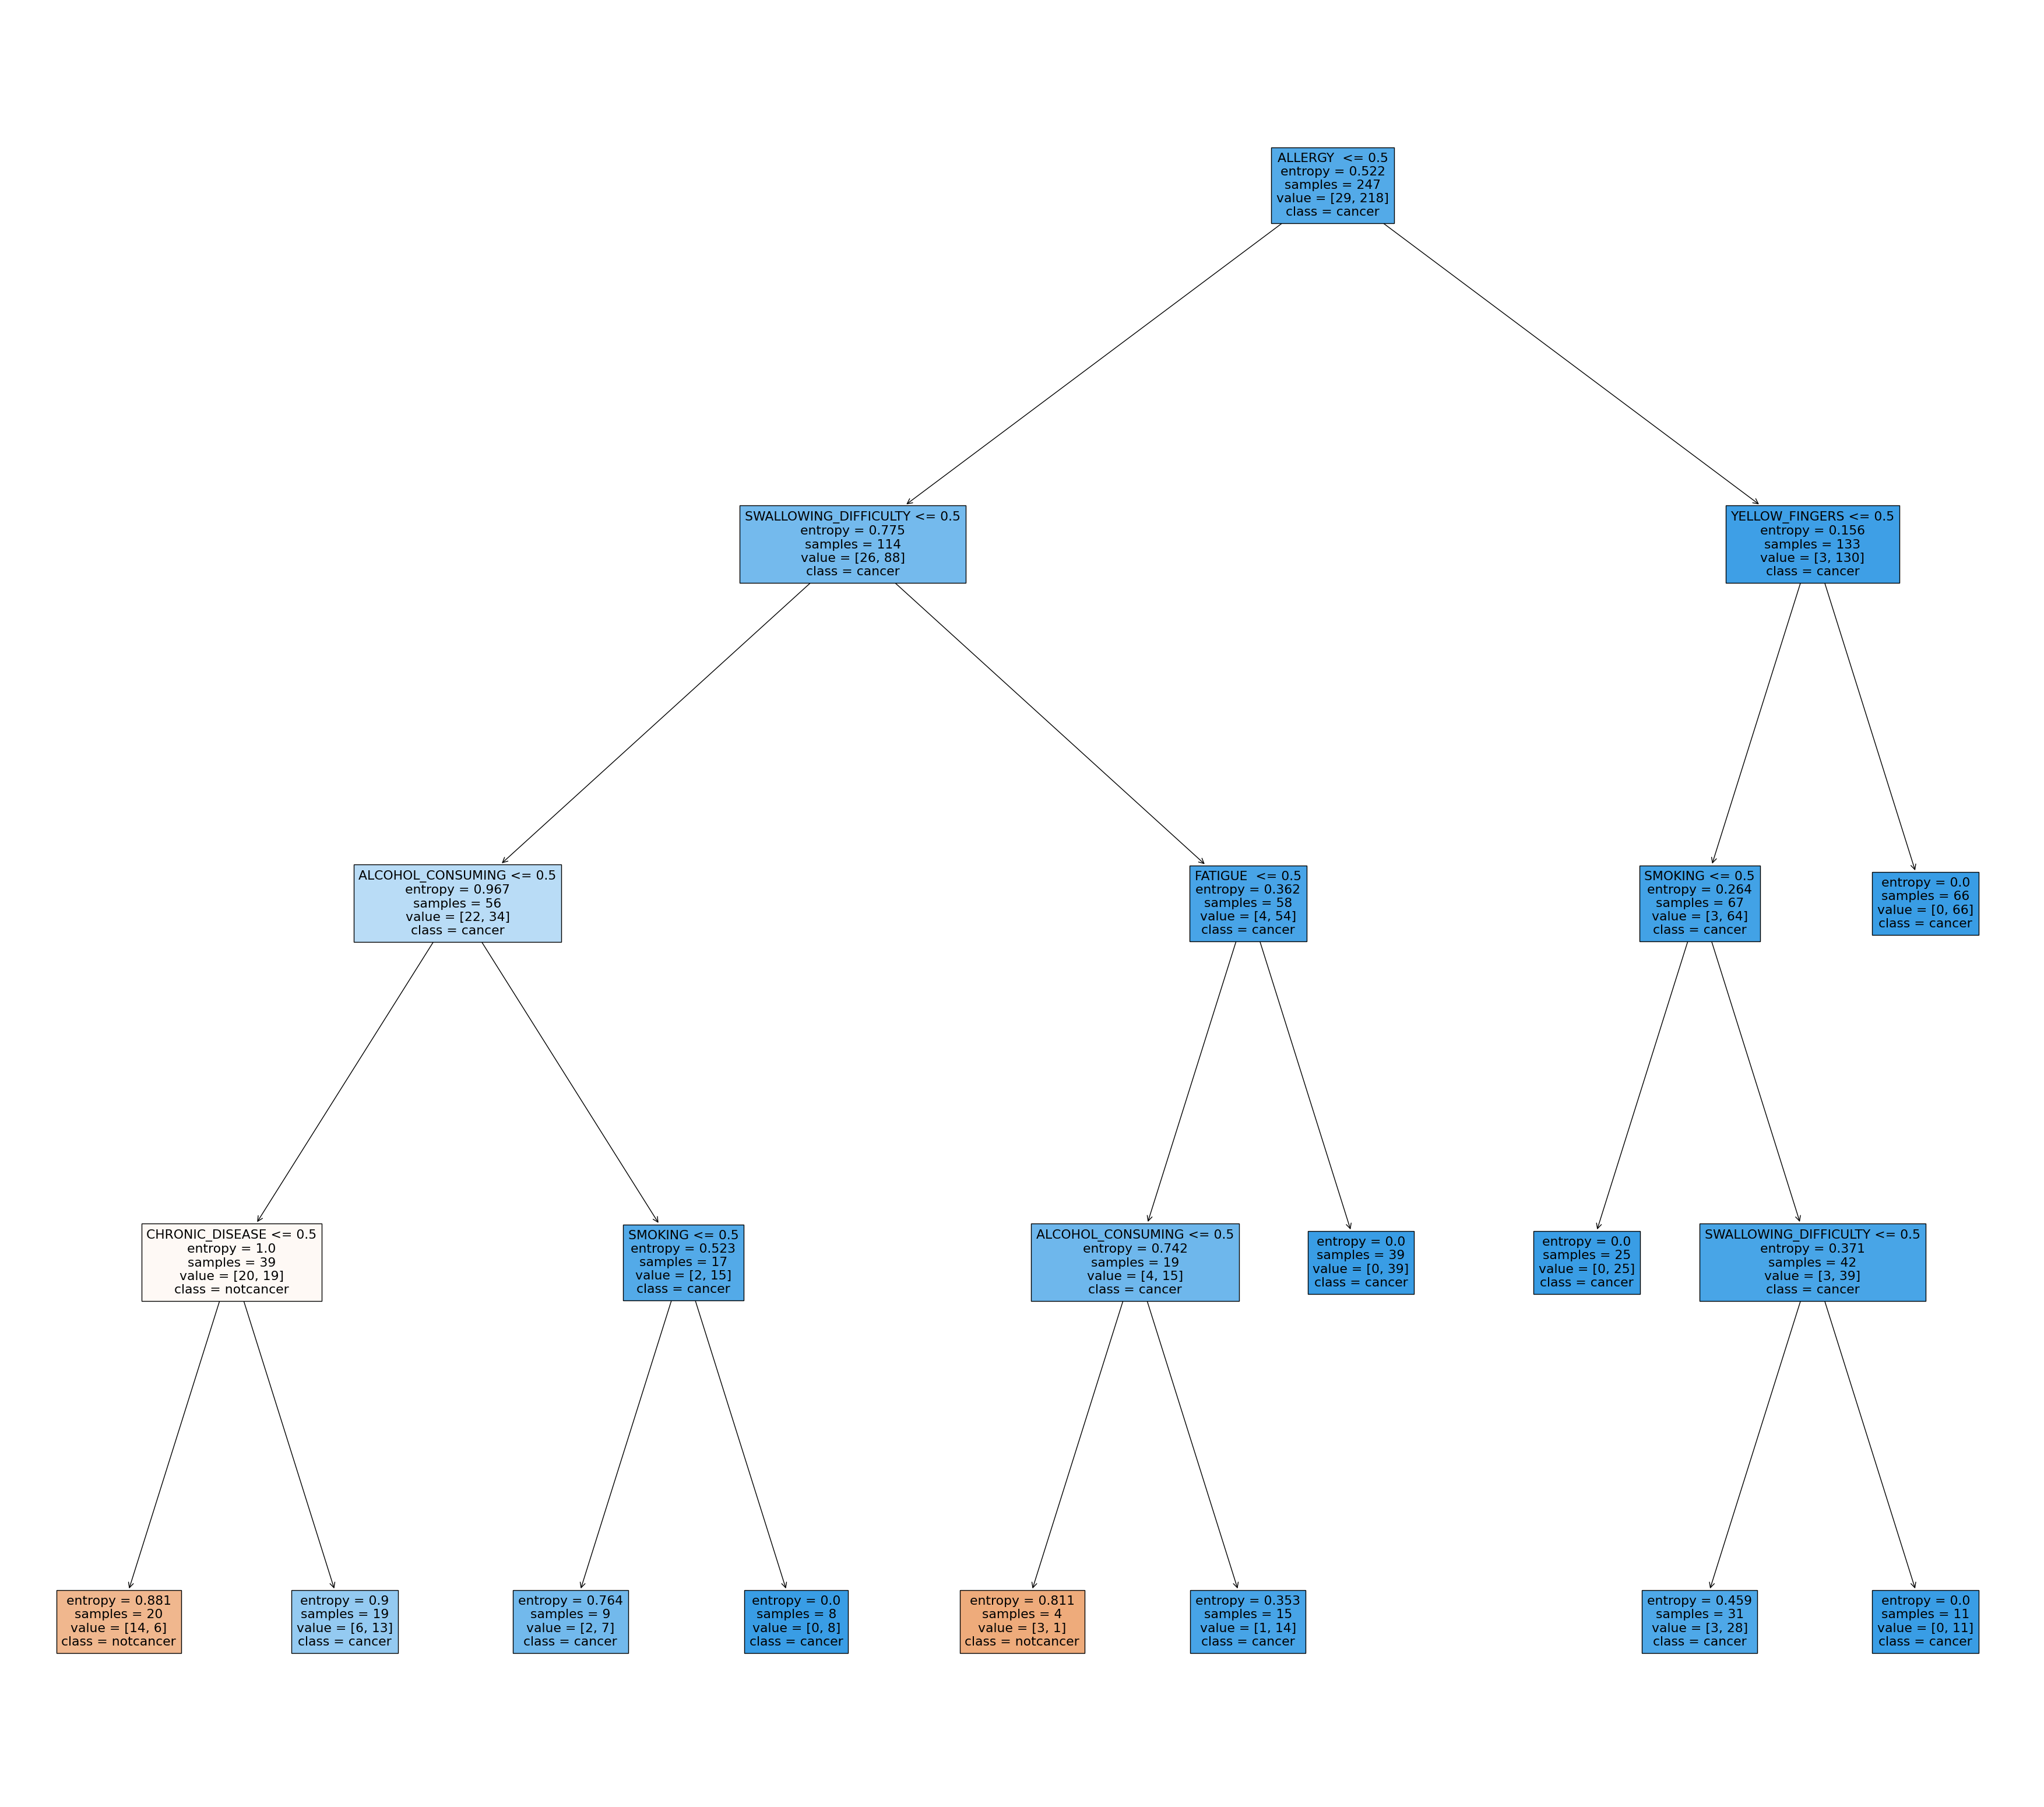

In [17]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['notcancer','cancer'],
                   filled=True)

# Save model

In [20]:
filename = 'klasifikasi_kanker.sav'
pickle.dump(dtc, open(filename, 'wb'))